In [1]:
import pandas as pd
import geopandas as gpd
import networkx as nx
import sqlite3
import folium
from folium import plugins
from IPython.display import IFrame
from shapely.geometry import Point, LineString
from folium import plugins
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import community
from IPython.display import display

In [117]:
bus_network = pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/network_bus.csv', sep=',', dtype=object)
combined_network = pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/network_combined.csv')
ferry_network = pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/network_ferry.csv')
temporal_day_network = pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/network_temporal_day.csv')
temporal_week_network = pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/network_temporal_week.csv')
walk_network = pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/network_walk.csv')
nodes_network = pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/network_nodes.csv')

stops = gpd.read_file('/lustrehome/niloofar/niloofar_work/ENEA/venice/stops.geojson')
sections = gpd.read_file('/lustrehome/niloofar/niloofar_work/ENEA/venice/sections.geojson')
routes = gpd.read_file('/lustrehome/niloofar/niloofar_work/ENEA/venice/routes.geojson')
top=pd.read_excel('/lustrehome/niloofar/niloofar_work/ENEA/venice/Topvenice.xlsx')

In [63]:
#Degree centrality Venice
# Import the necessary library
import networkx as nx

# Create a directed graph object
G = nx.DiGraph()

# Iterate through sections DataFrame to add edges to the graph
for index, row in sections.iterrows():
    source_stop = row['from_stop_I']
    target_stop = row['to_stop_I']
    G.add_edge(source_stop, target_stop)

# Calculate degree centrality for each node in the graph
degree_centrality = nx.degree_centrality(G)

# Sort nodes based on degree centrality in descending order
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Specify the number of top nodes to display
num_top_nodes = 10

# Print information about the top nodes with highest degree centrality
for node, centrality in sorted_nodes[:num_top_nodes]:
    print(f"Node {node}: Degree Centrality = {centrality}")


Node 1090: Degree Centrality = 0.010144153764014948
Node 540: Degree Centrality = 0.009076348104644954
Node 1841: Degree Centrality = 0.008542445274959957
Node 525: Degree Centrality = 0.006406833956219968
Node 102: Degree Centrality = 0.0058729311265349705
Node 15: Degree Centrality = 0.0058729311265349705
Node 75: Degree Centrality = 0.0058729311265349705
Node 164: Degree Centrality = 0.0053390282968499726
Node 324: Degree Centrality = 0.0048051254671649755
Node 1140: Degree Centrality = 0.0048051254671649755


In [68]:
# Calculate betweenness centrality
G = nx.DiGraph()
# Add edges from sections
for index, row in sections.iterrows():
    source_stop = row['from_stop_I']
    target_stop = row['to_stop_I']
    G.add_edge(source_stop, target_stop)
betweenness_centrality = nx.betweenness_centrality(G)
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
num_top_nodes = 10  
print(f"Top {num_top_nodes} nodes for Betweenness Centrality:")
for node, centrality in sorted_nodes[:num_top_nodes]:
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Top 10 nodes for Betweenness Centrality:
Node 324: Betweenness Centrality = 0.15745848332616488
Node 540: Betweenness Centrality = 0.12824237808646352
Node 551: Betweenness Centrality = 0.0962311491516388
Node 552: Betweenness Centrality = 0.09314974528896217
Node 835: Betweenness Centrality = 0.0843953342776408
Node 470: Betweenness Centrality = 0.0833696092776061
Node 1300: Betweenness Centrality = 0.08336447559655144
Node 834: Betweenness Centrality = 0.08216272467235938
Node 1092: Betweenness Centrality = 0.0814062736270357
Node 1809: Betweenness Centrality = 0.08085414604739762


In [69]:
# Calculate closeness centrality
G = nx.DiGraph()
# Add edges from sections
for index, row in sections.iterrows():
    source_stop = row['from_stop_I']

    target_stop = row['to_stop_I']
    G.add_edge(source_stop, target_stop)
closeness_centrality = nx.closeness_centrality(G)
sorted_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
num_top_nodes = 10 
print(f"Top {num_top_nodes} nodes for Closeness Centrality:")
for node, centrality in sorted_nodes[:num_top_nodes]:
    print(f"Node {node}: Closeness Centrality = {centrality}")

Top 10 nodes for Closeness Centrality:
Node 828: Closeness Centrality = 0.05041649738080388
Node 540: Closeness Centrality = 0.05028295357198121
Node 785: Closeness Centrality = 0.04927682316016849
Node 1751: Closeness Centrality = 0.04876694772874704
Node 542: Closeness Centrality = 0.04859356646615683
Node 1248: Closeness Centrality = 0.048469493386063094
Node 951: Closeness Centrality = 0.048405979741946215
Node 1754: Closeness Centrality = 0.04814170842850175
Node 1419: Closeness Centrality = 0.048107818943141506
Node 1140: Closeness Centrality = 0.04809935402567544


In [70]:
# Calculate eigenvector centrality
G = nx.DiGraph()
# Add edges from sections
for index, row in sections.iterrows():
    source_stop = row['from_stop_I']
    target_stop = row['to_stop_I']
    G.add_edge(source_stop, target_stop)
eigenvector_centrality = nx.eigenvector_centrality(G)

sorted_nodes = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

num_top_nodes = 10  
print(f"Top {num_top_nodes} nodes for Eigenvector Centrality:")
for node, centrality in sorted_nodes[:num_top_nodes]:
    print(f"Node {node}: Eigenvector Centrality = {centrality}")

Top 10 nodes for Eigenvector Centrality:
Node 75: Eigenvector Centrality = 0.42906823590274923
Node 26: Eigenvector Centrality = 0.3268611872937801
Node 27: Eigenvector Centrality = 0.2914171899109397
Node 112: Eigenvector Centrality = 0.2683283922608498
Node 74: Eigenvector Centrality = 0.2536417893456436
Node 15: Eigenvector Centrality = 0.24206802387102755
Node 62: Eigenvector Centrality = 0.2309538279074557
Node 60: Eigenvector Centrality = 0.18197069615098002
Node 120: Eigenvector Centrality = 0.17694698133818598
Node 6: Eigenvector Centrality = 0.17586488988896054


In [18]:
G = nx.Graph()
# Add nodes to the graph
for _, node_data in nodes_network.iterrows():
    G.add_node(node_data['stop_I'], lat=node_data['lat'], lon=node_data['lon'], name=node_data['name'])
# Add edges to the graph
for _, route_data in routes.iterrows():
    G.add_edge(route_data['route_I'], route_data['route_name'], lat=route_data['lat'], lon=route_data['lon'])
# Basic properties
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Network density:", nx.density(G))

Number of nodes: 2066
Number of edges: 872
Network density: 0.0004087860881468442


In [39]:
from shapely.geometry import Point
import pandas as pd

# Assuming your DataFrame is named df
stops['latitude'] = stops['geometry'].apply(lambda point: Point(point).y)
stops['longitude'] = stops['geometry'].apply(lambda point: Point(point).x)

# Drop the original 'geometry' column if you no longer need its
stops= stops.drop(columns=['geometry'])

# Print the updated DataFrame
print(stops)


        id stop_I                      name   latitude  longitude
0        0      1                 Redentore  45.425579  12.332047
1        1      2                S. Basilio  45.430534  12.320824
2        2      3                 Guglie dx  45.444294  12.324450
3        3      5             F.te Nove "A"  45.443958  12.339143
4        4      6             F.te Nove "D"  45.442867  12.341126
...    ...    ...                       ...        ...        ...
1869  1869   2483             Rivale Chiesa  45.457279  12.006639
1870  1870   2484             Rivale Chiesa  45.457153  12.006528
1871  1871   2485     Mellaredo - Capolinea  45.459576  11.993154
1872  1872   2486  Incr. via Accope'-Fratte  45.461864  12.052288
1873  1873   2487  Incr. via Accope'-Fratte  45.462029  12.052318

[1874 rows x 5 columns]


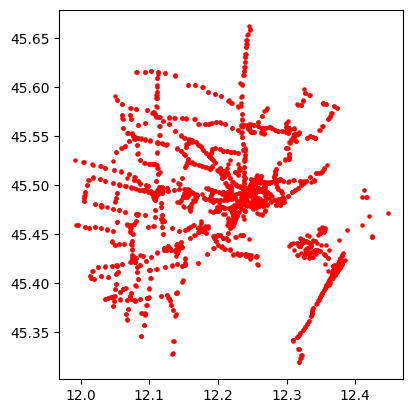

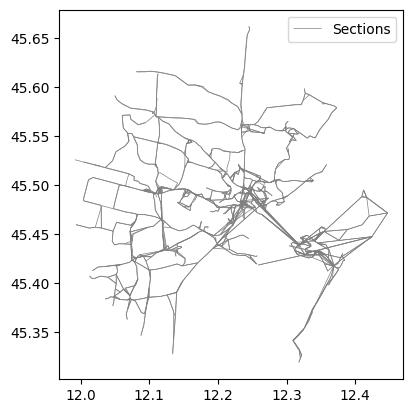

In [52]:
# Plotting the stops
stops.plot(marker='o', color='red', markersize=5, label='Stops')
# Plotting the sections (assuming sections are roads or paths)
sections.plot(color='gray', linewidth=0.5, label='Sections')
# Adding legend
plt.legend()
# Show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/contextily/tile.py:620: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


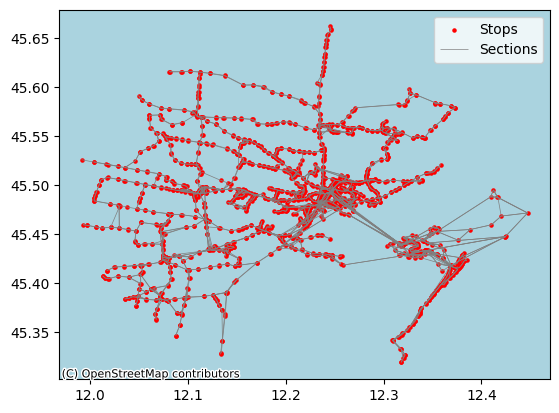

In [55]:
# Plotting the stops
ax = stops.plot(marker='o', color='red', markersize=5, label='Stops')
# Plotting the sections (assuming sections are roads or paths)
sections.plot(ax=ax, color='gray', linewidth=0.5, label='Sections')
# Adding legend
plt.legend()
# Add basemap from OpenStreetMap using contextily
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.show()

Import Libraries: Import the necessary libraries, including folium for creating interactive maps and geopandas for working with GeoDataFrames.

Create Base Map: Initialize a base map centered around Venice using folium.Map. Adjust the location and zoom_start parameters based on your preference.

Convert GeoDataFrame to GeoJSON: Use GeoPandas' to_json() method to convert the GeoDataFrame sections to GeoJSON format, which is suitable for plotting on the map.

Add GeoJSON Layers: Use folium.GeoJson to add GeoJSON layers to the map. Customize the appearance with the style_function. In this example, sections are styled with a blue color.

Layer Control: Add a Layer Control to the map. This allows users to toggle the visibility of different layers, enhancing interactivity.

Display the Map: Finally, display the map. You can include this code in a Jupyter Notebook or a script to visualize the map.

In [62]:
# Import necessary libraries
import folium
import geopandas as gpd

# Create a base map centered around Venice
venice_map = folium.Map(location=[45.4384, 12.3278], zoom_start=12)

# Convert GeoDataFrame 'sections' to GeoJSON for plotting on the map
# Note: GeoPandas has a built-in to_json() method that simplifies this process
sections_geojson = sections.to_crs(epsg='4326').to_json()

# Add GeoJSON layers to the map for sections and routes
folium.GeoJson(
    sections_geojson,
    name='Sections',
    # Style function to define the appearance of the GeoJSON layer
    style_function=lambda x: {'color': 'blue', 'red': 1}
).add_to(venice_map)

# Add Layer Control to toggle layers
# Note: LayerControl allows users to control which layers are visible on the map
folium.LayerControl().add_to(venice_map)

# Display the map
venice_map

#Top Nodes


In [82]:
import folium

}

# Coordinates for Venice (you can adjust this based on your dataset)
map_center = [45.4408, 12.3155]

# Create the base map
m = folium.Map(location=map_center, zoom_start=12)

# Function to assign color based on centrality degree
def get_color(row):
    for col in ['betweenness centrality', 'Degree Centrality', 'closeness centrality', 'eigenvector centrality']:
        if row[col] != 0:
            if col.lower() == 'betweenness centrality':
                return 'red'
            elif col.lower() == 'degree centrality':
                return 'blue'
            elif col.lower() == 'closeness centrality':
                return 'gray'
            elif col.lower() == 'eigenvector centrality':
                return 'pink'
    
    # If none of the centrality degrees are non-zero, return white
    return 'pink'

# Function to create pop-up content
def create_popup(row):
    content = "<b>Node ID:</b> " + str(row['Node_Id']) + "<br>"
    
    # Check if there's information about bus, tram, ferry
    for col in ['bus', 'tram', 'ferry']:
        if row[col] == 1:
            content += f"<b>{col.capitalize()}:</b> Yes<br>"
        elif row[col] == 0:
            content += f"<b>{col.capitalize()}:</b> No<br>"
    
    return content

# Add markers to the map
for index, row in top.iterrows():
    node_id = row['Node_Id']
    lat, lon = row['latitude'], row['Longitude']
    degree = get_color(row)

    popup_content = create_popup(row)  # Changed argument to row

    marker = folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color=degree)
    )
    marker.add_to(m)

# Display the map in the Jupyter Notebook
m

In [93]:
# Create the base map
m = folium.Map(location=map_center, zoom_start=12)
map_center = [41.9028, 12.4964] 
def get_color(row):
    for col in ['Betweenness_Centrality', 'Degree_Centrality', 'Closeness_Centrality', 'Eigenvector_Centrality']:
        if row[col] != 0:
            if col == 'Betweenness_Centrality':
                return 'red'
            elif col == 'Degree_Centrality':
                return 'blue'
            elif col == 'Closeness_Centrality':
                return 'gray'
            elif col == 'Eigenvector_Centrality':
                return 'pink'
    
    # If none of the centrality degrees are non-zero, return pink
    return 'pink'

# Function to create pop-up content
def create_popup(node_id, row):
    content = f"<b>Node ID:</b> {node_id}<br><b>Station Name:</b> {row['Station_name']}"

    transportation_info = []

    # Check if there's information about bus, tram, ferry
    for col in ['Bus', 'Tram', 'Ferry']:
        if row[col] == 1:
            transportation_info.append(col.capitalize())

    if transportation_info:
        content += f"<br><b>Transportation:</b> {' and '.join(transportation_info)}"
    
    return content

# Add markers to the map
for index, row in df.iterrows():
    node_id = row['Node_Id']
    lat, lon = row['latitude'], row['Longitude']
    degree = get_color(row)

    popup_content = create_popup(node_id, row)

    marker = folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_content, max_width=300),
        icon=folium.Icon(color=degree)
    )
    marker.add_to(m)

# Display the map in the Jupyter Notebook
m

In [98]:
#visualizing top 5 nodes by degree centrality in Venice base map 
import folium
from folium.plugins import MarkerCluster

# GeoJSON data representing nodes with their coordinates, IDs, and names
geojson_data = [
    {"geometry": {"type": "Point", "coordinates": [12.234174, 45.487579]}, "id": "1090", "type": "Feature", "properties": {"stop_I": "1265", "name": "P. tta 11 Febbraio"}},
    {"geometry": {"type": "Point", "coordinates": [12.119439, 45.565147]}, "id": "540", "type": "Feature", "properties": {"stop_I": "619", "name": "Civico 118  Borgo Venezia"}},
    {"geometry": {"type": "Point", "coordinates": [12.015465, 45.405052]}, "id": "1841", "type": "Feature", "properties": {"stop_I": "2433", "name": "P.tta S. Pietro"}},
    {"geometry": {"type": "Point", "coordinates": [12.11917, 45.542538]}, "id": "525", "type": "Feature", "properties": {"stop_I": "604", "name": "Incr. via Puccini"}},
    {"geometry": {"type": "Point", "coordinates": [12.355435, 45.456104]}, "id": "102", "type": "Feature", "properties": {"stop_I": "116", "name": "Murano Museo DX"}}
]

# Set the center of the map to Venice
map_center = [41.9028, 12.4964]
Venice_map = folium.Map(location=map_center, zoom_start=12)

# Create a marker cluster to group markers for better visualization
marker_cluster = MarkerCluster().add_to(Venice_map)

# Add markers for each node in the GeoJSON data
for feature in geojson_data:
    properties = feature.get("properties", {})
    coordinates = feature.get("geometry", {}).get("coordinates", [0, 0])
    node_id = properties.get("stop_I", "Unknown ID")
    node_name = properties.get("name", "Unknown Name")
    
    # Create a marker for each node and add it to the marker cluster
    folium.Marker(location=[coordinates[1], coordinates[0]], popup=f"ID: {node_id}, Name: {node_name}").add_to(marker_cluster)

# Display the map with the added markers
Venice_map


In [101]:
import folium
from folium.plugins import MarkerCluster

# GeoJSON data representing nodes with their coordinates, IDs, and names
geojson_data = [
    {"geometry": {"type": "Point", "coordinates": [12.234174, 45.487579]}, "id": "1090", "type": "Feature", "properties": {"stop_I": "1265", "name": "P. tta 11 Febbraio"}},
    {"geometry": {"type": "Point", "coordinates": [12.119439, 45.565147]}, "id": "540", "type": "Feature", "properties": {"stop_I": "619", "name": "Civico 118  Borgo Venezia"}},
    {"geometry": {"type": "Point", "coordinates": [12.015465, 45.405052]}, "id": "1841", "type": "Feature", "properties": {"stop_I": "2433", "name": "P.tta S. Pietro"}},
    {"geometry": {"type": "Point", "coordinates": [12.11917, 45.542538]}, "id": "525", "type": "Feature", "properties": {"stop_I": "604", "name": "Incr. via Puccini"}},
    {"geometry": {"type": "Point", "coordinates": [12.355435, 45.456104]}, "id": "102", "type": "Feature", "properties": {"stop_I": "116", "name": "Murano Museo DX"}}
]

# Set the center of the map to Venice
map_center = [41.9028, 12.4964]
Venice_map = folium.Map(location=map_center, zoom_start=12)

# Create a marker cluster to group markers for better visualization
marker_cluster = MarkerCluster().add_to(Venice_map)

# Add markers for each node in the GeoJSON data with different colors
for i, feature in enumerate(geojson_data):
    properties = feature.get("properties", {})
    coordinates = feature.get("geometry", {}).get("coordinates", [0, 0])
    node_id = properties.get("stop_I", "Unknown ID")
    node_name = properties.get("name", "Unknown Name")
    
    # Assign a unique color to each marker
    colors = ["red", "green", "blue", "orange", "purple"]
    color = colors[i % len(colors)]
    
    # Create a marker for each node and add it to the marker cluster
    folium.Marker(location=[coordinates[1], coordinates[0]], popup=f"ID: {node_id}, Name: {node_name}", icon=folium.Icon(color=color)).add_to(marker_cluster)


Venice_map.get_root().html.add_child(folium.Element(legend_html))

# Display the map with the added markers and legend
Venice_map


In [123]:
bus_network

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,route_I_counts,Unnamed: 6
0,135,10224:00:00,6816:00:00,60,9,458:01:00,NaN
1,136,10296:00:00,3792:00:00,50,6,443:01:00,NaN
2,137,45504:00:00,6384:00:00,40,3,458:01:00,NaN
3,137,1622,299,0,7,652:07:00,NaN
4,138,140,362,60,1,526:01:00,NaN
...,...,...,...,...,...,...,...
2392,2483,28296:00:00,19296:00:00,1824:00:00,360:00:00,544:02:00,463:01:00
2393,2484,59544:00:00,11808:00:00,1440:00:00,504:00:00,547:13:00,473:01:00
2394,2485,28272:00:00,7080:00:00,0:00:00,504:00:00,547:13:00,473:01:00
2395,2486,46224:00:00,30264:00:00,2880:00:00,120:00:00,472:01:00,NaN


In [124]:
sections

,n_vehicles,to_stop_I,route_type,from_stop_I,duration_avg,route_I_counts,geometry,BUS
0,9,426,3,135,60.0,"{'461': 1, '652': 7, '458': 1}","LINESTRING (12.14748 45.43642, 12.14412 45.43543)",0
1,6,429,3,136,50.0,"{'443': 1, '454': 2, '645': 3}","LINESTRING (12.14192 45.43527, 12.14395 45.43533)",0
2,3,1896,3,137,40.0,"{'461': 1, '458': 1, '462': 1}","LINESTRING (12.14105 45.43289, 12.14019 45.43058)",0
3,7,1622,3,137,0.0,{'652': 7},"LINESTRING (12.14105 45.43289, 12.13724 45.43267)",0
4,4,715,3,138,60.0,"{'470': 1, '472': 1, '469': 1, '473': 1}","LINESTRING (12.07299 45.45889, 12.08032 45.46365)",0
...,...,...,...,...,...,...,...,...
2732,41,27,4,132,540.0,"{'52': 3, '56': 34, '57': 4}","LINESTRING (12.36056 45.42543, 12.36184 45.43383)",0
2733,42,13,4,132,300.0,"{'73': 8, '79': 3, '76': 21, '74': 10}","LINESTRING (12.36056 45.42543, 12.36897 45.41814)",0
2734,1,46,4,133,600.0,{'48': 1},"LINESTRING (12.35993 45.41211, 12.36754 45.41736)",0
2735,10,127,4,133,300.0,{'45': 10},"LINESTRING (12.35993 45.41211, 12.35535 45.41962)",0


In [146]:
import pandas as pd

# Assuming your first DataFrame is bus_network and the second one is bus_data
for index, row in bus_network.iterrows():
    from_stop_I_network = row['from_stop_I']
    
    # Find the corresponding row in bus_data
    matching_row = bus_network[bus_network['from_stop_I'] == from_stop_I_network]
    
    if not matching_row.empty:
        # Update the 'BUS' column in bus_data
        sections.loc[matching_row.index, 'BUS'] = 1

# Print the updated bus_data
print(sections)


      n_vehicles  to_stop_I  route_type  from_stop_I  duration_avg  \
0              9        426           3          135          60.0   
1              6        429           3          136          50.0   
2              3       1896           3          137          40.0   
3              7       1622           3          137           0.0   
4              4        715           3          138          60.0   
...          ...        ...         ...          ...           ...   
2732          41         27           4          132         540.0   
2733          42         13           4          132         300.0   
2734           1         46           4          133         600.0   
2735          10        127           4          133         300.0   
2736         137          1           4          134         180.0   

                                         route_I_counts  \
0                        {'461': 1, '652': 7, '458': 1}   
1                        {'443': 1, '454'

In [147]:
sections

,n_vehicles,to_stop_I,route_type,from_stop_I,duration_avg,route_I_counts,geometry,BUS,FERRY
0,9,426,3,135,60.0,"{'461': 1, '652': 7, '458': 1}","LINESTRING (12.14748 45.43642, 12.14412 45.43543)",1,0
1,6,429,3,136,50.0,"{'443': 1, '454': 2, '645': 3}","LINESTRING (12.14192 45.43527, 12.14395 45.43533)",1,0
2,3,1896,3,137,40.0,"{'461': 1, '458': 1, '462': 1}","LINESTRING (12.14105 45.43289, 12.14019 45.43058)",1,0
3,7,1622,3,137,0.0,{'652': 7},"LINESTRING (12.14105 45.43289, 12.13724 45.43267)",1,0
4,4,715,3,138,60.0,"{'470': 1, '472': 1, '469': 1, '473': 1}","LINESTRING (12.07299 45.45889, 12.08032 45.46365)",1,0
...,...,...,...,...,...,...,...,...,...
2732,41,27,4,132,540.0,"{'52': 3, '56': 34, '57': 4}","LINESTRING (12.36056 45.42543, 12.36184 45.43383)",0,1
2733,42,13,4,132,300.0,"{'73': 8, '79': 3, '76': 21, '74': 10}","LINESTRING (12.36056 45.42543, 12.36897 45.41814)",0,1
2734,1,46,4,133,600.0,{'48': 1},"LINESTRING (12.35993 45.41211, 12.36754 45.41736)",0,1
2735,10,127,4,133,300.0,{'45': 10},"LINESTRING (12.35993 45.41211, 12.35535 45.41962)",0,1


In [125]:
ferry_network

,from_stop_I,to_stop_I,d,duration_avg,n_vehicles,route_I_counts,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,696:00:00,10920:00:00,4320:00:00,3288:00:00,102:03:00,149:06:00,150:31:00,57:04:00,56:34:00,52:03:00,58:02:00,NaN,NaN
1,1,1848:00:00,12480:00:00,3615:45:59,3288:00:00,66:01:00,142:12:00,143:31:00,144:02:00,110:01:00,111:01:00,109:04:00,NaN,NaN
2,2,73,820,300,35,93:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1008:00:00,9408:00:00,4320:00:00,2232:00:00,144:02:00,110:01:00,109:04:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2,2448:00:00,10776:00:00,4320:00:00,3096:00:00,147:39:00,91:35:00,151:06:00,150:31:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,132,648:00:00,22584:00:00,540,41,56:34:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,132,312:00:00,25032:00:00,7200:00:00,42,73:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,133,46,833,600,1,48:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,133,127,908,300,10,45:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
# Add a new column 'FERRY' to the 'test' DataFrame
sections['FERRY'] = 0  # Initialize the column with 0

# Update the 'TRAM' column based on the condition
for index, row in sections.iterrows():
    if row['from_stop_I'] in ferry_network['from_stop_I'].values:
        sections.at[index, 'FERRY'] = 1

# Save the updated 'sections' DataFrame to a new CSV file or perform any other required operations
sections.to_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/testbusferry.csv', index=False)
testbusferry=pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/testbusferry.csv')

In [149]:
testbusferry

,n_vehicles,to_stop_I,route_type,from_stop_I,duration_avg,route_I_counts,geometry,BUS,FERRY
0,9,426,3,135,60.0,"{'461': 1, '652': 7, '458': 1}","LINESTRING (12.147483 45.436424, 12.14412 45.4...",1,0
1,6,429,3,136,50.0,"{'443': 1, '454': 2, '645': 3}","LINESTRING (12.141922 45.435265, 12.143954 45....",1,0
2,3,1896,3,137,40.0,"{'461': 1, '458': 1, '462': 1}","LINESTRING (12.141052 45.432892, 12.140191 45....",1,0
3,7,1622,3,137,0.0,{'652': 7},"LINESTRING (12.141052 45.432892, 12.137235 45....",1,0
4,4,715,3,138,60.0,"{'470': 1, '472': 1, '469': 1, '473': 1}","LINESTRING (12.072989 45.458889, 12.080317 45....",1,0
...,...,...,...,...,...,...,...,...,...
2732,41,27,4,132,540.0,"{'52': 3, '56': 34, '57': 4}","LINESTRING (12.360565 45.425426, 12.361842 45....",0,1
2733,42,13,4,132,300.0,"{'73': 8, '79': 3, '76': 21, '74': 10}","LINESTRING (12.360565 45.425426, 12.368973 45....",0,1
2734,1,46,4,133,600.0,{'48': 1},"LINESTRING (12.359925 45.412113, 12.36754 45.4...",0,1
2735,10,127,4,133,300.0,{'45': 10},"LINESTRING (12.359925 45.412113, 12.35535 45.4...",0,1


In [150]:
stops

,id,stop_I,name,geometry
0,0,1,Redentore,POINT (12.33205 45.42558)
1,1,2,S. Basilio,POINT (12.32082 45.43053)
2,2,3,Guglie dx,POINT (12.32445 45.44429)
3,3,5,"F.te Nove ""A""",POINT (12.33914 45.44396)
4,4,6,"F.te Nove ""D""",POINT (12.34113 45.44287)
...,...,...,...,...
1869,1869,2483,Rivale Chiesa,POINT (12.00664 45.45728)
1870,1870,2484,Rivale Chiesa,POINT (12.00653 45.45715)
1871,1871,2485,Mellaredo - Capolinea,POINT (11.99315 45.45958)
1872,1872,2486,Incr. via Accope'-Fratte,POINT (12.05229 45.46186)


In [151]:

# Convert the data types to ensure consistency
testbusferry['from_stop_I'] = testbusferry['from_stop_I'].astype(str)
stops['stop_I'] = stops['stop_I'].astype(str)

# Merge datasets based on the 'from_stop_I' column
merged_data = pd.merge(testbusferry, stops, how='inner', left_on='from_stop_I', right_on='stop_I', suffixes=('_bus_tram', '_stops'))

# Save the matching rows to a new CSV file or perform any other required operations
merged_data.to_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/okvenice.csv', index=False)

In [152]:
okvenice=pd.read_csv('/lustrehome/niloofar/niloofar_work/ENEA/venice/okvenice.csv')

In [153]:
okvenice

,n_vehicles,to_stop_I,route_type,from_stop_I,duration_avg,route_I_counts,geometry_bus_tram,BUS,FERRY,id,stop_I,name,geometry_stops
0,9,426,3,135,60.0,"{'461': 1, '652': 7, '458': 1}","LINESTRING (12.147483 45.436424, 12.14412 45.4...",1,0,119,135,Incr. via Di Vittorio,POINT (12.147483 45.436424)
1,6,429,3,136,50.0,"{'443': 1, '454': 2, '645': 3}","LINESTRING (12.141922 45.435265, 12.143954 45....",1,0,120,136,Mira Scuole Civ.16,POINT (12.141922 45.435265)
2,3,1896,3,137,40.0,"{'461': 1, '458': 1, '462': 1}","LINESTRING (12.141052 45.432892, 12.140191 45....",1,0,121,137,Civico 35,POINT (12.141052 45.432892)
3,7,1622,3,137,0.0,{'652': 7},"LINESTRING (12.141052 45.432892, 12.137235 45....",1,0,121,137,Civico 35,POINT (12.141052 45.432892)
4,4,715,3,138,60.0,"{'470': 1, '472': 1, '469': 1, '473': 1}","LINESTRING (12.072989 45.458889, 12.080317 45....",1,0,122,138,Incr. via Stazione,POINT (12.072989 45.458889)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,41,27,4,132,540.0,"{'52': 3, '56': 34, '57': 4}","LINESTRING (12.360565 45.425426, 12.361842 45....",0,1,116,132,S. Elena SX,POINT (12.360565 45.425426)
2733,42,13,4,132,300.0,"{'73': 8, '79': 3, '76': 21, '74': 10}","LINESTRING (12.360565 45.425426, 12.368973 45....",0,1,116,132,S. Elena SX,POINT (12.360565 45.425426)
2734,1,46,4,133,600.0,{'48': 1},"LINESTRING (12.359925 45.412113, 12.36754 45.4...",0,1,117,133,S. Lazzaro,POINT (12.359925 45.412113)
2735,10,127,4,133,300.0,{'45': 10},"LINESTRING (12.359925 45.412113, 12.35535 45.4...",0,1,117,133,S. Lazzaro,POINT (12.359925 45.412113)
